In [1]:
import pandas as pd
from pathlib import Path

In [2]:
results_directory = Path("./results/20260114_T7_2microns/")

In [3]:
csv_files = sorted(results_directory.glob("*.csv"))

if not csv_files:
    raise ValueError("No CSV files found in folder")

df = pd.concat(
    [pd.read_csv(f) for f in csv_files],
    ignore_index=True
)

In [5]:
df.columns

Index(['filename', 'well_id', 'organoid', 'multiposition_id', 'label',
       'membrane_area_x', 'membrane_Occludin_RFP_mean_int',
       'membrane_Occludin_RFP_min_int', 'membrane_Occludin_RFP_max_int',
       'membrane_Occludin_RFP_std_int', 'membrane_Occludin_RFP_max_mean_ratio',
       'membrane_Occludin_RFP_sum_int', 'membrane_area_y',
       'membrane_Claudin_FITC_mean_int', 'membrane_Claudin_FITC_min_int',
       'membrane_Claudin_FITC_max_int', 'membrane_Claudin_FITC_std_int',
       'membrane_Claudin_FITC_max_mean_ratio', 'membrane_Claudin_FITC_sum_int',
       'cell_area', 'cell_Occludin_RFP_mean_int', 'cell_Occludin_RFP_min_int',
       'cell_Occludin_RFP_max_int', 'cell_Occludin_RFP_std_int',
       'cell_Occludin_RFP_max_mean_ratio', 'cell_Occludin_RFP_sum_int',
       'organoid_area', 'organoid_perimeter', 'organoid_eccentricity',
       'organoid_solidity', 'organoid_extent'],
      dtype='object')

In [7]:
# Merge df with conditions
df_conditions = pd.read_csv("./results/20260114_T7_2microns_conditions.csv")

In [8]:
df_merged = df.merge(
    df_conditions,
    left_on="well_id",
    right_on="well_id",
    how="left"
)

# Wells in df without condition info
missing = df_merged["condition"].isna().sum()
print(f"Rows without condition: {missing}")

# Unique wells before/after
print(df["well_id"].nunique(), df_merged["well_id"].nunique())

Rows without condition: 0
12 12


In [10]:
df_merged.columns

Index(['filename', 'well_id', 'organoid', 'multiposition_id', 'label',
       'membrane_area_x', 'membrane_Occludin_RFP_mean_int',
       'membrane_Occludin_RFP_min_int', 'membrane_Occludin_RFP_max_int',
       'membrane_Occludin_RFP_std_int', 'membrane_Occludin_RFP_max_mean_ratio',
       'membrane_Occludin_RFP_sum_int', 'membrane_area_y',
       'membrane_Claudin_FITC_mean_int', 'membrane_Claudin_FITC_min_int',
       'membrane_Claudin_FITC_max_int', 'membrane_Claudin_FITC_std_int',
       'membrane_Claudin_FITC_max_mean_ratio', 'membrane_Claudin_FITC_sum_int',
       'cell_area', 'cell_Occludin_RFP_mean_int', 'cell_Occludin_RFP_min_int',
       'cell_Occludin_RFP_max_int', 'cell_Occludin_RFP_std_int',
       'cell_Occludin_RFP_max_mean_ratio', 'cell_Occludin_RFP_sum_int',
       'organoid_area', 'organoid_perimeter', 'organoid_eccentricity',
       'organoid_solidity', 'organoid_extent', 'condition', 'simplified'],
      dtype='object')

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

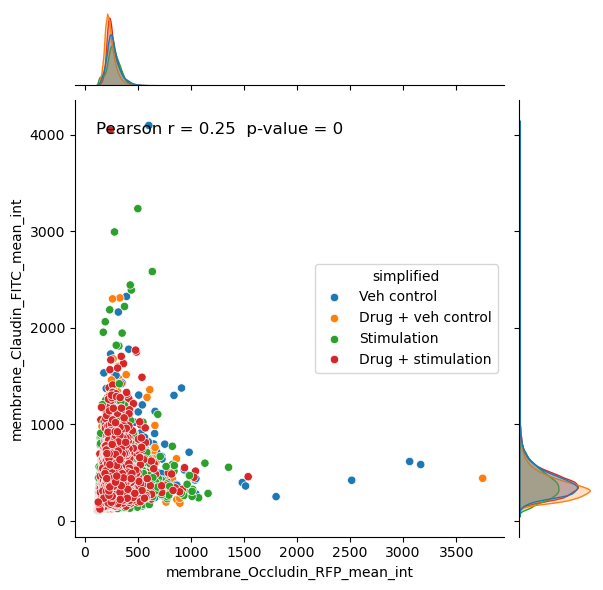

In [16]:
sns.jointplot(x='membrane_Occludin_RFP_mean_int',y='membrane_Claudin_FITC_mean_int',data=df_merged, hue='simplified')

# Calculate Pearson r and p-value
r, p = pearsonr(df_merged['membrane_Occludin_RFP_mean_int'], df_merged['membrane_Claudin_FITC_mean_int'])

# Annotate with Pearson r and p-value
plt.annotate(f'Pearson r = {r:.2f}  p-value = {p:.2g}',
             xy=(0.05, 0.95), xycoords='axes fraction',
             ha='left', va='top', fontsize=12)

plt.show()

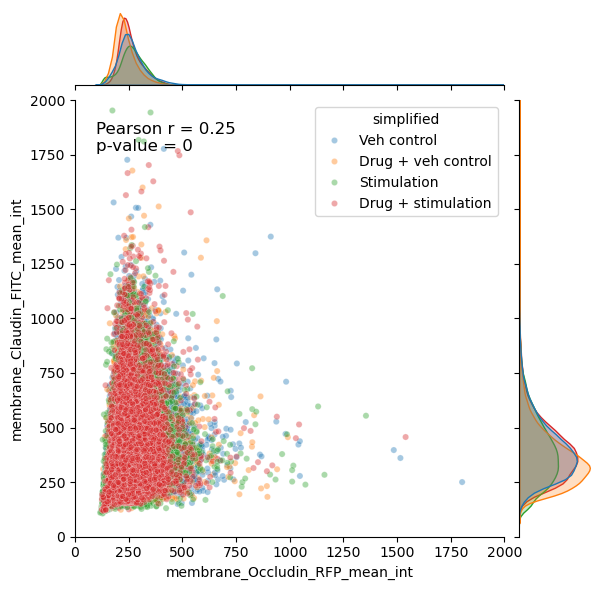

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

g = sns.jointplot(
    x='membrane_Occludin_RFP_mean_int',
    y='membrane_Claudin_FITC_mean_int',
    data=df_merged,
    hue='simplified',
    joint_kws=dict(alpha=0.4, s=20)
)

# Clip axes
g.ax_joint.set_xlim(0, 2000)
g.ax_joint.set_ylim(0, 2000)

# Pearson correlation (on full data, not clipped)
r, p = pearsonr(
    df_merged['membrane_Occludin_RFP_mean_int'],
    df_merged['membrane_Claudin_FITC_mean_int']
)

# Annotate
g.ax_joint.annotate(
    f'Pearson r = {r:.2f}\np-value = {p:.2g}',
    xy=(0.05, 0.95),
    xycoords='axes fraction',
    ha='left',
    va='top',
    fontsize=12
)

plt.show()


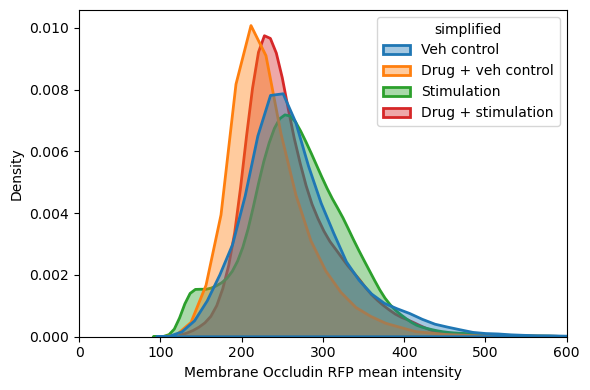

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

sns.kdeplot(
    data=df_merged,
    x="membrane_Occludin_RFP_mean_int",
    hue="simplified",
    fill=True,
    common_norm=False,   # important: keep per-condition densities
    alpha=0.4,
    linewidth=2
)

plt.xlim(0, 600)
plt.xlabel("Membrane Occludin RFP mean intensity")
plt.ylabel("Density")

plt.tight_layout()
plt.show()


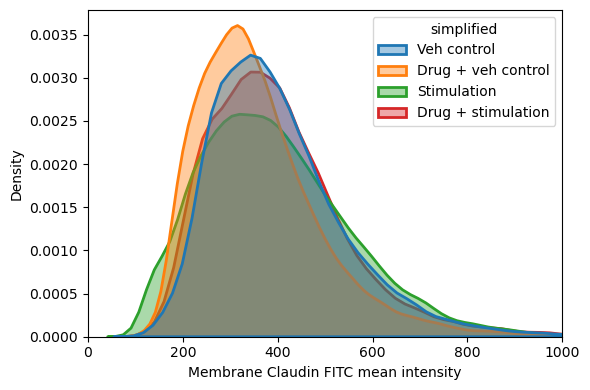

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

sns.kdeplot(
    data=df_merged,
    x="membrane_Claudin_FITC_mean_int",
    hue="simplified",
    fill=True,
    common_norm=False,   # important: keep per-condition densities
    alpha=0.4,
    linewidth=2
)

plt.xlim(0, 1000)
plt.xlabel("Membrane Claudin FITC mean intensity")
plt.ylabel("Density")

plt.tight_layout()
plt.show()


In [24]:
df_merged.columns

Index(['filename', 'well_id', 'organoid', 'multiposition_id', 'label',
       'membrane_area_x', 'membrane_Occludin_RFP_mean_int',
       'membrane_Occludin_RFP_min_int', 'membrane_Occludin_RFP_max_int',
       'membrane_Occludin_RFP_std_int', 'membrane_Occludin_RFP_max_mean_ratio',
       'membrane_Occludin_RFP_sum_int', 'membrane_area_y',
       'membrane_Claudin_FITC_mean_int', 'membrane_Claudin_FITC_min_int',
       'membrane_Claudin_FITC_max_int', 'membrane_Claudin_FITC_std_int',
       'membrane_Claudin_FITC_max_mean_ratio', 'membrane_Claudin_FITC_sum_int',
       'cell_area', 'cell_Occludin_RFP_mean_int', 'cell_Occludin_RFP_min_int',
       'cell_Occludin_RFP_max_int', 'cell_Occludin_RFP_std_int',
       'cell_Occludin_RFP_max_mean_ratio', 'cell_Occludin_RFP_sum_int',
       'organoid_area', 'organoid_perimeter', 'organoid_eccentricity',
       'organoid_solidity', 'organoid_extent', 'condition', 'simplified'],
      dtype='object')

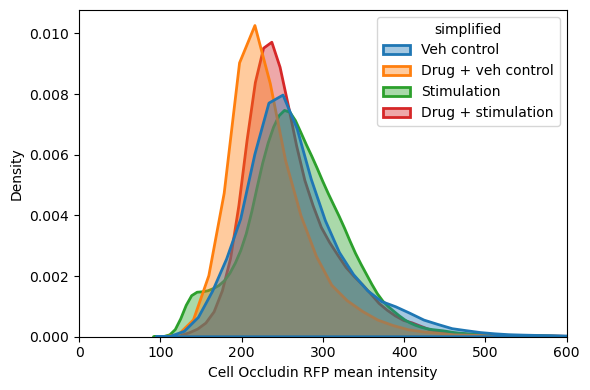

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

sns.kdeplot(
    data=df_merged,
    x="cell_Occludin_RFP_mean_int",
    hue="simplified",
    fill=True,
    common_norm=False,   # important: keep per-condition densities
    alpha=0.4,
    linewidth=2
)

plt.xlim(0, 600)
plt.xlabel("Cell Occludin RFP mean intensity")
plt.ylabel("Density")

plt.tight_layout()
plt.show()